In [170]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


#Membaca Dataset


In [171]:
data = pd.read_csv('diabetes.csv')
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

#Korelasi Antar Variable


In [172]:
correlation_matrix = data[['Glucose','BMI','Age',]].corr()


#VISUALISASI KORELASI


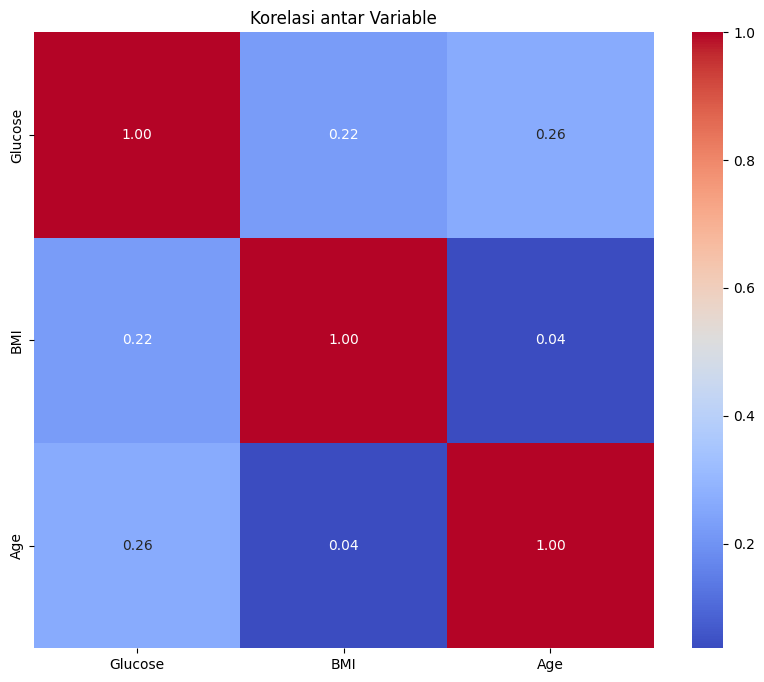

In [173]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar Variable')
plt.show()

#TRAINING DATASET WITH RANDOM FOREST ALGORITHM

#MEMISAHKAN FITUR DAN LABEL

In [174]:
X = data[['Glucose','BMI','Age']]
y = data['Outcome']


#MEMBAGI DATA MENJADI PELATIHAN DAN PENGUJIAN

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#MEMBUAT MODEL RANDOM FOREST

In [176]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

#TINGKAT KEPENTINGAN FITUR

In [177]:
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importances'])
print(feature_importances.sort_values(by='Importances', ascending=False))

         Importances
Glucose     0.409889
BMI         0.325523
Age         0.264588


#EVALUASI MODEL

In [178]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [179]:
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.7337662337662337
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154



In [180]:
glucose_value = float(input('Masukan Nilai Glukosa-Nya : '))
BMI_value = float(input('Masukan Nilai BMI : '))
Age_value = float(input('Masukan umur : '))

Masukan Nilai Glukosa-Nya : 120
Masukan Nilai BMI : 17
Masukan umur55


#DATA BARU YANG AKAN DI PREDIKSI


In [181]:
data_baru = pd.DataFrame({'Glucose' : [glucose_value], 'BMI': [BMI_value], 'Age': [Age_value]})

#PREDIKSI MENGGUNAKAN MODEL YG SUDAH DIBUAT

In [182]:
prediksi = model.predict(data_baru)
print(prediksi)

[0]


#MENENTUKAN HASIL PREDIKSI

In [183]:

if prediksi[0] == 1:
    print("Orang ini kemungkinan memiliki diabetes.")
else:
    print("Orang ini kemungkinan tidak memiliki diabetes.")


Orang ini kemungkinan tidak memiliki diabetes.
